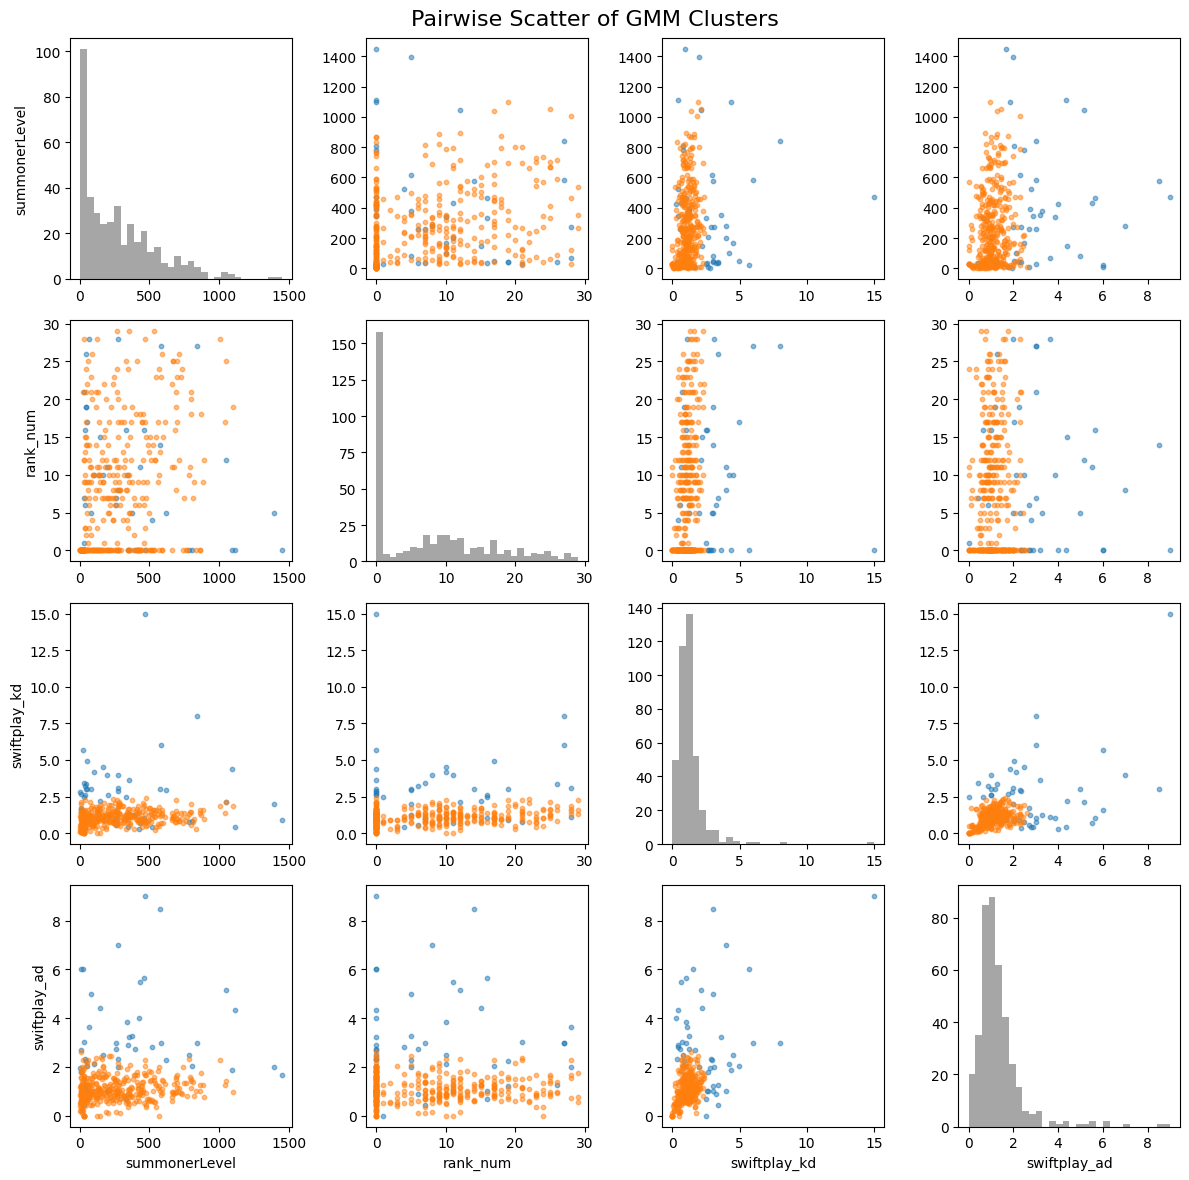

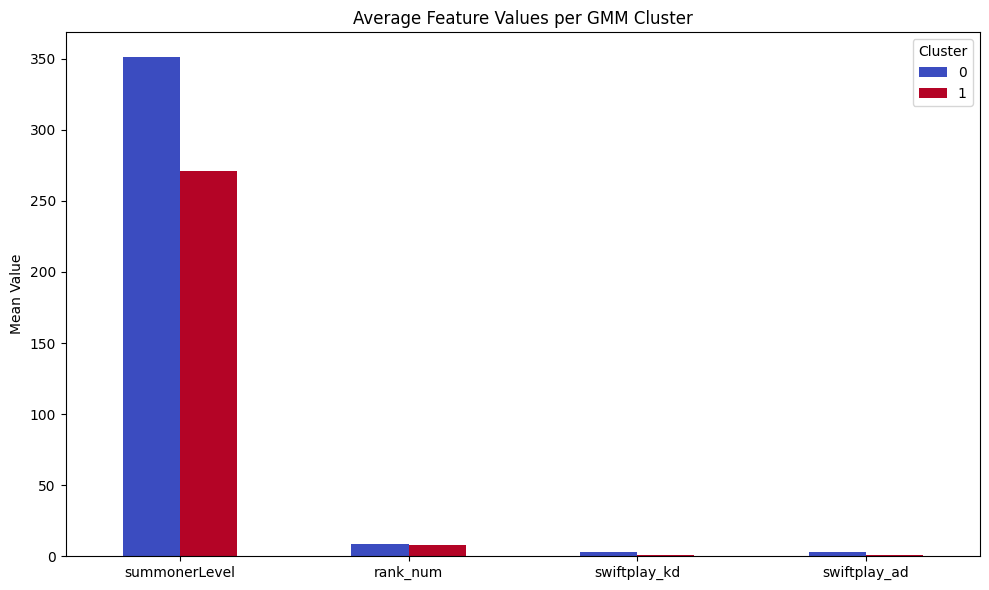

In [37]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
from common import get_all_data, rank_order
import matplotlib.pyplot as plt


players, ranked_matches, ranked_player_match_data, swiftplay_matches, swiftplay_player_match_data = get_all_data()
players["rank_num"] = players["full_rank"].cat.codes

features = ["summonerLevel", "rank_num", "swiftplay_kd", "swiftplay_ad"]

X = players[features].values

gmm = GMM(n_components=2).fit(X)
labels = gmm.predict(X)

fig, axs = plt.subplots(len(features), len(features), figsize=(12, 12))
for i in range(len(features)):
    for j in range(len(features)):
        if i == j:
            axs[i, j].hist(X[:, i], bins=30, color='gray', alpha=0.7)
        else:
            for label in [0, 1]:
                axs[i, j].scatter(X[labels == label, j], X[labels == label, i], 
                                  alpha=0.5, label=f"Cluster {label}", s=10)
        if i == len(features)-1:
            axs[i, j].set_xlabel(features[j])
        if j == 0:
            axs[i, j].set_ylabel(features[i])
plt.suptitle("Pairwise Scatter of GMM Clusters", fontsize=16)
plt.tight_layout()
plt.show()

clustered = pd.DataFrame(X, columns=features)
clustered["label"] = labels

# Compute mean values for each feature in each cluster
means = clustered.groupby("label").mean().T

# Plot
means.plot(kind="bar", figsize=(10, 6), colormap="coolwarm")
plt.title("Average Feature Values per GMM Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

In [56]:
players_who_play_both = players.dropna(subset=["ranked_deaths"])["puuid"]
players_who_only_play_swiftplay = players[~players["puuid"].isin(players_who_play_both)]["puuid"]
both_filtered = players[players["puuid"].isin(players_who_play_both)]
swiftplay_filtered = players[players["puuid"].isin(players_who_only_play_swiftplay)]

# Rank

## Players who play both distribution

<Axes: xlabel='full_rank'>

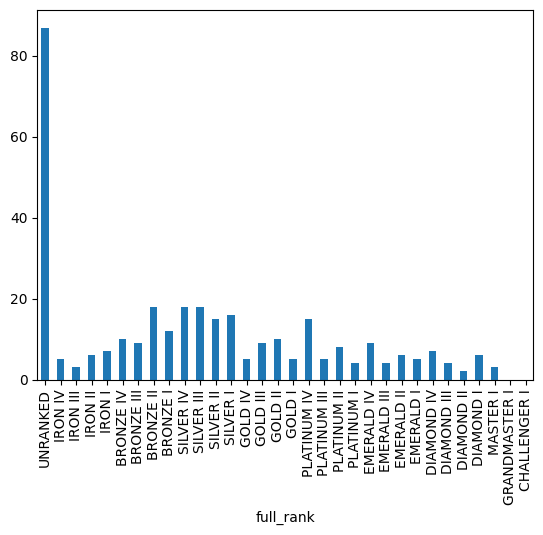

In [57]:
both_filtered["full_rank"].value_counts().reindex(rank_order).plot(kind='bar')

## Players who only play swiftplay distribution

<Axes: xlabel='full_rank'>

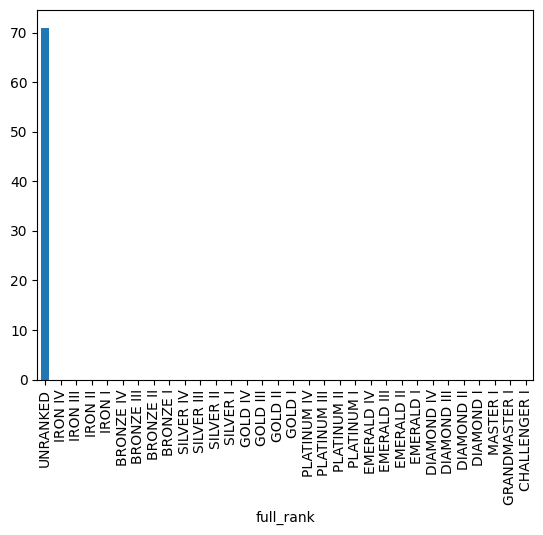

In [40]:
swiftplay_filtered["full_rank"].value_counts().reindex(rank_order).plot(kind='bar')

# Summoner Level

## Players who play both distribution

<Axes: ylabel='Frequency'>

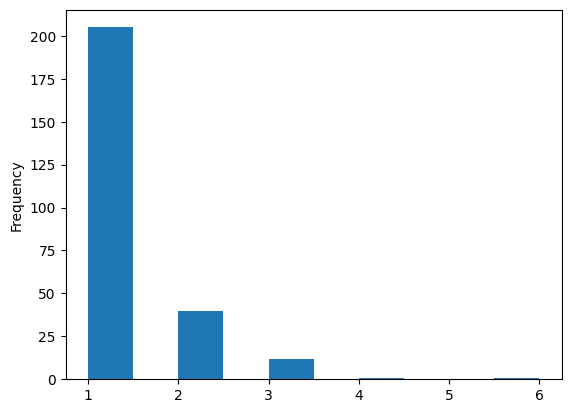

In [41]:
both_filtered["summonerLevel"].value_counts().plot(kind='hist')

## Players who only play swiftplay distribution

<Axes: ylabel='Frequency'>

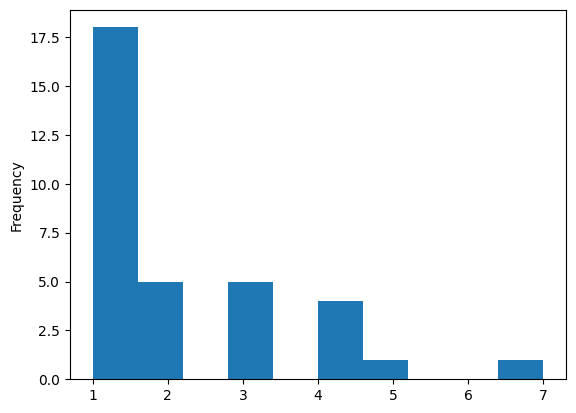

In [42]:
swiftplay_filtered["summonerLevel"].value_counts().plot(kind='hist')

# K/D

## Players who play both distribution

<Axes: ylabel='Frequency'>

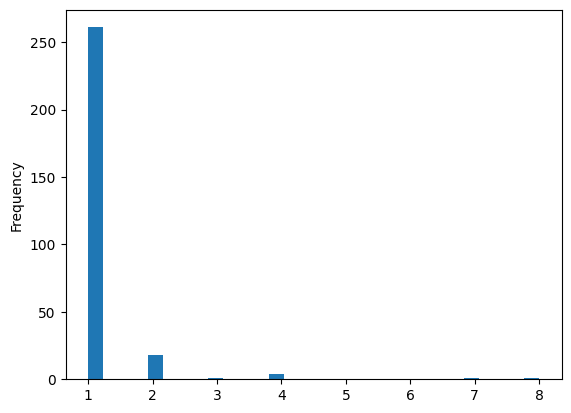

In [43]:
both_filtered["swiftplay_kd"].value_counts().plot(kind='hist', bins=30)

## Players who only play swiftplay distribution

<Axes: ylabel='Frequency'>

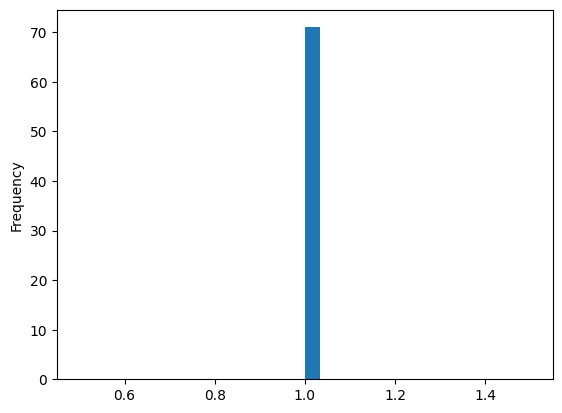

In [44]:
swiftplay_filtered["swiftplay_kd"].value_counts().plot(kind='hist', bins=30)

# A/D

## Players who play both distribution

<Axes: ylabel='Frequency'>

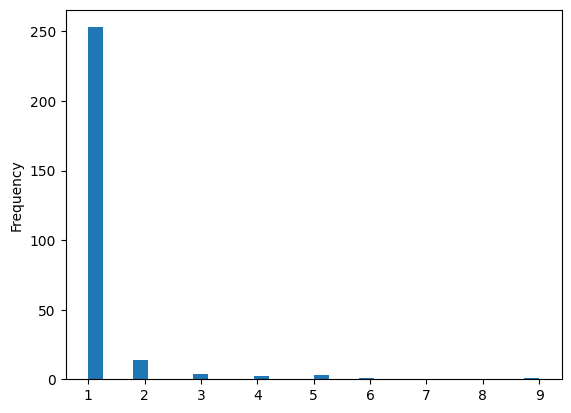

In [45]:
both_filtered["swiftplay_ad"].value_counts().plot(kind='hist', bins=30)

## Players who only play swiftplay distribution

<Axes: ylabel='Frequency'>

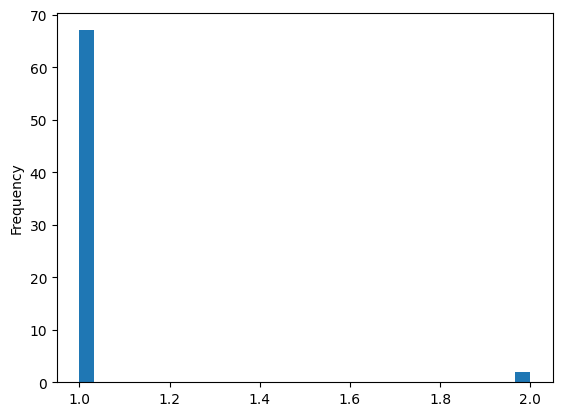

In [46]:
swiftplay_filtered["swiftplay_ad"].value_counts().plot(kind='hist', bins=30)

# KDA

## Players who play both distribution

<Axes: ylabel='Frequency'>

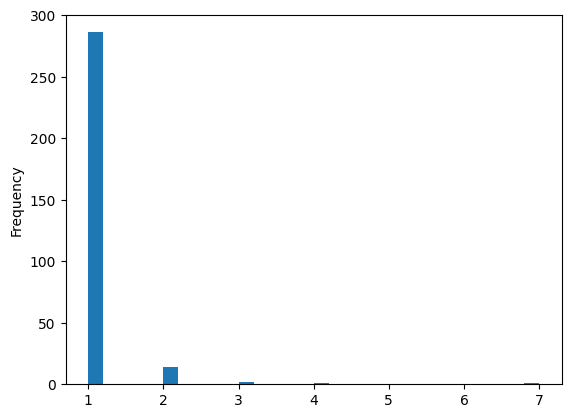

In [47]:
both_filtered["swiftplay_kda"].value_counts().plot(kind='hist', bins=30)

## Players who only play swiftplay distribution

<Axes: ylabel='Frequency'>

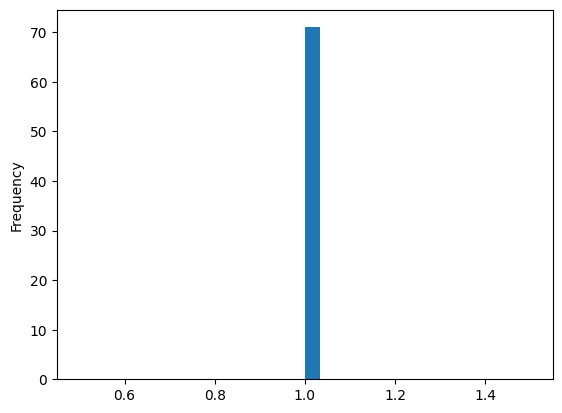

In [48]:
swiftplay_filtered["swiftplay_kda"].value_counts().plot(kind='hist', bins=30)

# KAD

## Players who play both distribution

<Axes: ylabel='Frequency'>

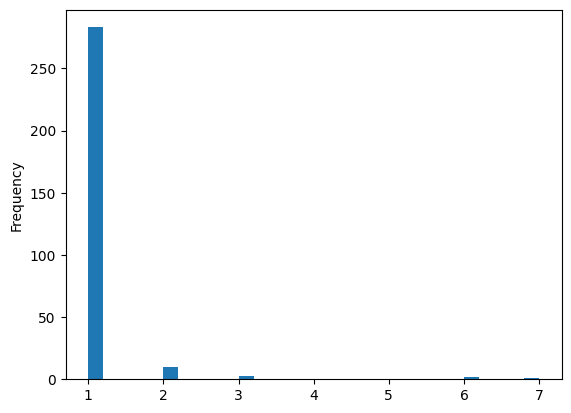

In [49]:
both_filtered["swiftplay_kad"].value_counts().plot(kind='hist', bins=30)

## Players who only play swiftplay distribution

<Axes: ylabel='Frequency'>

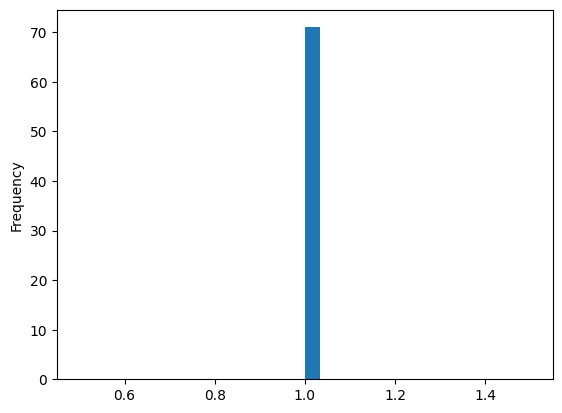

In [50]:
swiftplay_filtered["swiftplay_kad"].value_counts().plot(kind='hist', bins=30)

# Swiftplay Win/Loss Ratio

## Players who play both distribution

<Axes: ylabel='Frequency'>

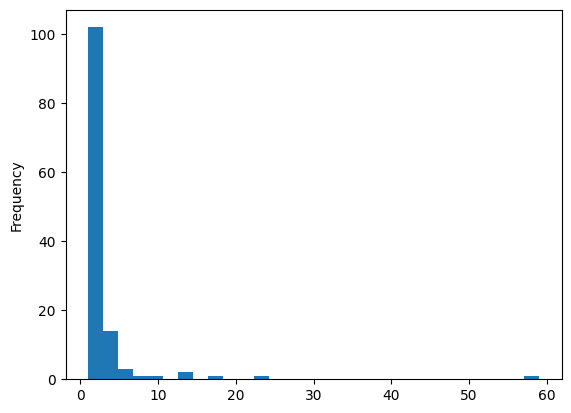

In [52]:
both_filtered["swiftplay_win_loss_ratio"].value_counts().plot(kind='hist', bins=30)

## Players who only play swiftplay distribution

<Axes: ylabel='Frequency'>

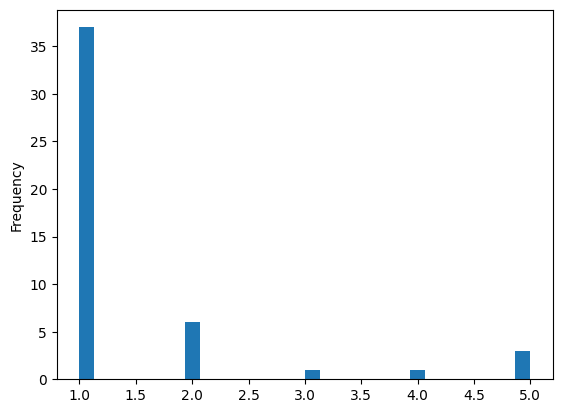

In [53]:
swiftplay_filtered["swiftplay_win_loss_ratio"].value_counts().plot(kind='hist', bins=30)

# Logistic Regression Model

In [61]:
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = players[["summonerLevel", "rank_num", "swiftplay_kd", "swiftplay_ad", "swiftplay_kda", "swiftplay_kad", "swiftplay_win_loss_ratio"]].values
y = players["ranked_deaths"].isna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
penalty = "l2"
C = 1.0
class_weight = None

StandardScaler().fit_transform(X)

clf = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight, fit_intercept=False, solver="liblinear")

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

print("Test Metrics:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred_proba))

Test Metrics:
Accuracy: 0.9135802469135802
Precision: 0.7058823529411765
Recall: 0.8571428571428571
F1 Score: 0.7741935483870968
ROC AUC: 0.9434968017057569
